# 04 Analysis

In [26]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr

In [27]:
# Load in dataframes
accidents_with_speeds_df = pd.read_csv("../data/accidents_with_speeds_agg.csv", index_col="Unnamed: 0")
accidents_with_temps_df = pd.read_csv("../data/traffic_temperature_agg.csv", index_col="Unnamed: 0")

In [ ]:
# Show data we can work with
display(accidents_with_speeds_df.head())
display(accidents_with_temps_df.head())

,date,speed_limit,count
0,2018-07-05,40.0,1
1,2018-07-05,50.0,9
2,2018-07-05,70.0,3
3,2018-07-05,80.0,2
4,2018-07-05,100.0,2


,date,incident_info,mean_temperature,min_temperature,max_temperature,total_precipitation,snow_on_ground
0,2018-07-05,18,17.0,8.3,25.6,0.0,0.0
1,2018-07-06,18,22.5,12.1,32.9,0.2,0.0
2,2018-07-07,11,17.7,10.7,24.6,0.0,0.0
3,2018-07-08,7,15.2,6.2,24.2,0.0,0.0
4,2018-07-09,21,18.3,9.0,27.7,0.0,0.0


In [29]:
# Although we saved the number of accidents with the temperature info, for now we're going to drop it
accidents_with_temps_df = accidents_with_temps_df.drop(columns=['incident_info'])

In [30]:
# Join two datasets together
complete_df = pd.merge(accidents_with_speeds_df, accidents_with_temps_df, on='date', how='left')
complete_df.head()

,date,speed_limit,count,mean_temperature,min_temperature,max_temperature,total_precipitation,snow_on_ground
0,2018-07-05,40.0,1,17.0,8.3,25.6,0.0,0.0
1,2018-07-05,50.0,9,17.0,8.3,25.6,0.0,0.0
2,2018-07-05,70.0,3,17.0,8.3,25.6,0.0,0.0
3,2018-07-05,80.0,2,17.0,8.3,25.6,0.0,0.0
4,2018-07-05,100.0,2,17.0,8.3,25.6,0.0,0.0


### Pearson's Correlation

##### All Data

In [31]:
# Build Correlation matrix on our dataframe
corr_matrix = complete_df.corr()
corr_matrix

,speed_limit,count,mean_temperature,min_temperature,max_temperature,total_precipitation,snow_on_ground
speed_limit,1.000000,-0.298786,-0.008119,-0.008574,-0.007449,0.002294,0.007891
count,-0.298786,1.000000,-0.106232,-0.104381,-0.103981,0.034943,0.094044
mean_temperature,-0.008119,-0.106232,1.000000,0.977335,0.983605,0.075149,-0.598950
min_temperature,-0.008574,-0.104381,0.977335,1.000000,0.923153,0.134140,-0.589155
max_temperature,-0.007449,-0.103981,0.983605,0.923153,1.000000,0.022223,-0.585810
total_precipitation,0.002294,0.034943,0.075149,0.134140,0.022223,1.000000,-0.052748
snow_on_ground,0.007891,0.094044,-0.598950,-0.589155,-0.585810,-0.052748,1.000000


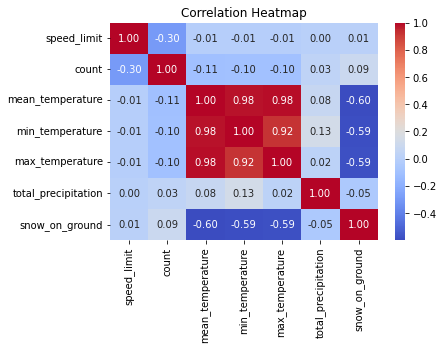

In [32]:
# Create correlation heatmap on our dataframe
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Make sure we have no null values in the snow on ground column
complete_df.dropna(subset=['snow_on_ground'], inplace=True)

In [ ]:
# Print out the Pearson correlation coefficient and the associated P-value

print("Speed Limits:")
r, p_value = pearsonr(complete_df['speed_limit'], complete_df['count'])

print(f"Correlation (r): {r:.3f}")
print(f"P-value: {p_value:.5f}")

print("Snow on Ground:")
r, p_value = pearsonr(complete_df['snow_on_ground'], complete_df['count'])

print(f"Correlation (r): {r:.3f}")
print(f"P-value: {p_value:.5f}")

Speed Limits:
Correlation (r): -0.299
P-value: 0.00000
Snow on Ground:
Correlation (r): 0.094
P-value: 0.00000


##### October, November, December Only Analysis

In [35]:
complete_df['date'] = pd.to_datetime(complete_df['date'])

In [36]:
# Only keep data in october, november, december
oct_nov_dec_df = complete_df[
    complete_df['date'].dt.month.isin([10, 11, 12])
]


In [37]:
# Create another correlation matrix
corr_matrix = oct_nov_dec_df.corr()
corr_matrix

,speed_limit,count,mean_temperature,min_temperature,max_temperature,total_precipitation,snow_on_ground
speed_limit,1.000000,-0.292383,-0.003867,-0.004992,-0.002675,0.002000,0.002156
count,-0.292383,1.000000,-0.154601,-0.154868,-0.144588,0.110339,0.067055
mean_temperature,-0.003867,-0.154601,1.000000,0.957265,0.971737,-0.072751,-0.527226
min_temperature,-0.004992,-0.154868,0.957265,1.000000,0.861971,0.007675,-0.509927
max_temperature,-0.002675,-0.144588,0.971737,0.861971,1.000000,-0.134133,-0.508327
total_precipitation,0.002000,0.110339,-0.072751,0.007675,-0.134133,1.000000,0.048956
snow_on_ground,0.002156,0.067055,-0.527226,-0.509927,-0.508327,0.048956,1.000000


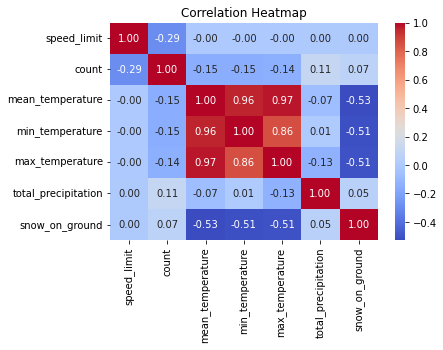

In [38]:
# Create correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Print out the Pearson correlation coefficient and the associated P-value

print("Speed Limits:")
r, p_value = pearsonr(oct_nov_dec_df['speed_limit'], oct_nov_dec_df['count'])

print(f"Correlation (r): {r:.3f}")
print(f"P-value: {p_value:.5f}")

print("Snow on Ground:")
r, p_value = pearsonr(oct_nov_dec_df['snow_on_ground'], oct_nov_dec_df['count'])

print(f"Correlation (r): {r:.3f}")
print(f"P-value: {p_value:.5f}")

Speed Limits:
Correlation (r): -0.292
P-value: 0.00000
Snow on Ground:
Correlation (r): 0.067
P-value: 0.00005


As we can see, the correlation coefficients and p-values are nearly identical for both dataframes, whether data for the full year or data for October through December only. 

**Important:** The above analysis is looking at the correlation between speed limits, temperature, precipitation, and the snow on the ground with the number of accidents independently (ie. temperature and snow on ground are not connected to each other). For our analysis however, we want to examine if snow on the ground AND the speed limit impacts the number of accidents. To do this, we need a mode complex model than the one above.

### Negative Binomial Regression

In [84]:
# Use Negative Binomial Regression to evaluate the impacts of speed and snow on the count together, not just one of them.

nb_model = smf.glm(
    formula="count ~ speed_limit * snow_on_ground",
    data=complete_df,
    family=sm.families.NegativeBinomial()
).fit()

print(nb_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                12570
Model:                            GLM   Df Residuals:                    12566
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29430.
Date:                Sat, 10 Jan 2026   Deviance:                       5049.4
Time:                        14:49:51   Pearson chi2:                 6.41e+03
No. Iterations:                     9   Pseudo R-squ. (CS):            0.05211
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Summary of Findings

This project looked at how speed limits and winter weather are related to traffic accidents. When looking at simple correlations, speed limits and snow appeared to be related to accident counts, but these relationships were generally weak. To better understand the data, a negative binomial regression model was used because accident counts are not evenly distributed. The results showed that roads with higher speed limits tend to have fewer accidents overall, likely because they are designed differently than lower-speed roads. Snow on the ground by itself did not clearly increase accidents, but it did change how speed limits affect accidents. In snowy conditions, the safety advantage of higher-speed roads becomes smaller, meaning winter weather makes driving conditions riskier regardless of road type.